# Tracking of object height (altitude)

In this task, we will track the height of a climbing accelerating object. Denote the acceleration by $a$, the initial velocity $v_0$ and the initial height by $y_0 = 0$. It holds

$$
    y_t = v_0 t + \frac{1}{2} a t^2 + \varepsilon_t, \qquad \text{iid}\quad \varepsilon_t \sim \mathcal{N}(0, \sigma^2).
$$

We will model this sequentially, i.e., at time instants $t=1, t=2, \ldots$, when we incorporate new measurement $y_t$ and regressor $x_t$ into the prior. We aim to estimate:
- $\beta = [\beta_1, \beta_2]^\intercal = [v_0, a]$ - regression coefficients,
- $\sigma^2$ - noise variance.

---
**Task 1: Rewrite the model to a vector form.**

---

Since we assume the noise to be normally distributed, the model is normal too,

$$
y_t \sim \mathcal{N}(\beta^\intercal x_t, \sigma^2).
$$

We will use the conjugate *normal inverse-gamma* prior distribution (why?).

In [2]:
import numpy as np
import matplotlib.pylab as plt
from nig import NiG                        # NiG prior class
np.set_printoptions(precision=2)

We load the data and **need to determine their number**.

In [3]:
y = np.load('tracking-data.npz')['y']

#---------------------------------------------
# Determine the number of measurements
ndat = y.size
#---------------------------------------------
print('There are {0} measurements'.format(ndat))
print('Their shape is: ', y.shape)

There are 80 measurements
Their shape is:  (80,)


Let us plot the data evolution

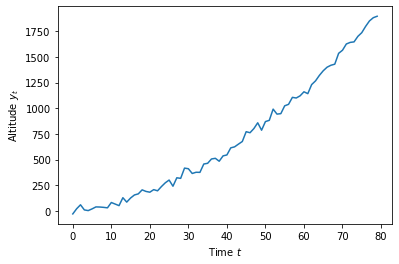

In [4]:
plt.plot(y)
plt.xlabel('Time $t$')
plt.ylabel('Altitude $y_t$')
plt.show()

---

**Task 2: Complete the code below.**
    
---

Sequential estimation follows. Recall that

$$
y_t = v_0 t + \frac{1}{2} a t^2 + \varepsilon_t =
\underbrace{
\begin{bmatrix}
v_0 \\
a
\end{bmatrix}^\intercal
}_{\beta^\intercal}
\underbrace{
\begin{bmatrix}
t \\
\frac{1}{2}t^2
\end{bmatrix}
}_{x_t}
+ \varepsilon_t.
$$

In [8]:
xi0 = np.diag([1., .01, .01])   # Prior xi_0
nu0 = 5.                         # Prior nu_0
regmodel = NiG(xi0, nu0)         # NiG object

for t in range(ndat):
    ##############################################
    # x_t should be a correct regressor
    # (recall, python indexes from 0 while
    # in physics t=1,2,...
    xt += np.array([t+1, 1/2 * (t+1)**2])
    yt = y[t]
    ##############################################
    
    regmodel.update(yt, xt)      # update of the prior
    regmodel.log()               # logging

The posterior estimates are:

In [9]:
print(f'Final estimate of beta: {regmodel.Ebeta}')
print(f'Final estimate of sigma2: {regmodel.Esigma2:.2f}')
print(f'Var(beta): {regmodel.var_beta}')
print(f'Var(sigma2): {regmodel.var_sigma2:.2f}')

Final estimate of beta: [ 0.78 -0.01]
Final estimate of sigma2: 972.21
Var(beta): [2.01e-04 3.86e-07]
Var(sigma2): 23338.01


---
**Task 3: Below, we plot the estimates. Interpret the results.**

---

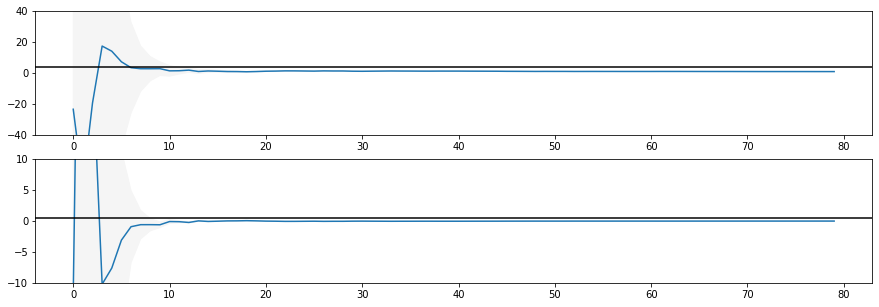

In [10]:
Ebeta_log = np.array(regmodel.Ebeta_log)
std_beta_log = np.array(regmodel.var_beta_log)

plt.figure(figsize=(15,5))
plt.subplot(211)
plt.plot(Ebeta_log[:, 0])
plt.fill_between(np.arange(ndat),
                 Ebeta_log[:, 0] + 3 * std_beta_log[:, 0],
                 Ebeta_log[:, 0] - 3 * std_beta_log[:, 0],
                 color='whitesmoke'
                 )
plt.axhline(4, color='black')
plt.ylim(-40, 40)

plt.subplot(212)
plt.plot(Ebeta_log[:, 1])
plt.fill_between(np.arange(ndat),
                 Ebeta_log[:, 1] + 3 * std_beta_log[:, 1],
                 Ebeta_log[:, 1] - 3 * std_beta_log[:, 1],
                 color='whitesmoke'
                 )
plt.axhline(.5, color='black')
plt.ylim(-10, 10)
plt.show()

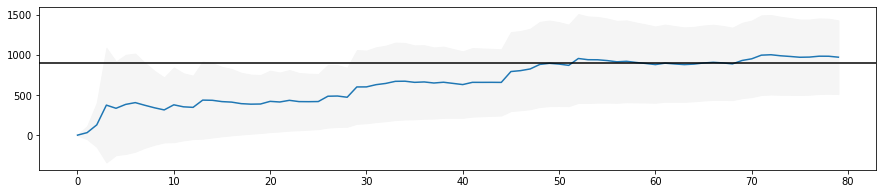

In [11]:
std_sigma2_log = np.sqrt(np.array(regmodel.var_sigma2_log))

plt.figure(figsize=(15, 3))
plt.plot(regmodel.Esigma2_log)
plt.fill_between(np.arange(ndat),
                 np.array(regmodel.Esigma2_log) + 3. * std_sigma2_log,
                 np.array(regmodel.Esigma2_log) - 3. * std_sigma2_log,
                 color='whitesmoke'
                 )
plt.axhline(900, color='black')
#plt.ylim(-20, 2000)

The true values were:
   - v0 = 4
   - a = .5
   - sigma2 = 900
   
Add horizontal black lines into the respective plots above.